# Projeto: Análise Estatística de Braço Robótico Planar (2R)

Este projeto simula a distribuição de probabilidade da posição da garra (ponta) de um braço robótico planar de dois links (2R). O objetivo é observar visualmente como uma distribuição de entrada **uniforme** (nos ângulos das juntas) se transforma em uma distribuição de saída **não uniforme** no espaço de trabalho (posições X, Y).

Este é um exemplo clássico de transformação de variáveis aleatórias, onde a complexidade analítica (cálculo do Jacobiano) é contornada através de uma simulação de Monte Carlo.

## Contexto Teórico

As variáveis de entrada são os ângulos de rotação, $\theta_1$ e $\theta_2$. Assumimos que ambos são variáveis aleatórias independentes com distribuição uniforme no intervalo $[-\pi, \pi]$.

A posição da garra (X, Y) é calculada usando as equações de cinemática direta:

$$X = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2)$$
$$Y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2)$$

Onde $L_1$ e $L_2$ são os comprimentos dos braços. A "surpresa" deste projeto é que, embora $f(\theta_1, \theta_2)$ seja uniforme, a densidade de probabilidade resultante $f(X, Y)$ não é. Ela é inversamente proporcional ao determinante Jacobiano da transformação, resultando em concentrações de alta densidade nos limites do espaço de trabalho.

## Requisitos

Para executar esta simulação, você precisará das seguintes bibliotecas Python:
* `numpy`
* `pandas`
* `matplotlib`

Você pode instalar todas elas executando:
```bash
pip install -r requirements.txt
```

## Como Executar

O projeto é executado através do script principal `simulation.py`.

1.  Clone este repositório (ou crie os arquivos).
2.  Instale as dependências (veja acima).
3.  Execute o script:

    ```bash
    python simulation.py
    ```

O script irá:
1.  Gerar 1 milhão de amostras de $(\theta_1, \theta_2)$.
2.  Calcular as posições $(X, Y)$ para os cenários definidos.
3.  Salvar os dados brutos na pasta `data/` (ex: `data/robot_data_L1_1_L2_1.csv`).
4.  Gerar e salvar os mapas de calor na pasta `plots/` (ex: `plots/robot_data_L1_1_L2_1.png`).

## Análise dos Resultados

A simulação gera dois mapas de calor principais que revelam a distribuição de $f(X, Y)$.

### Cenário 1: Braços Iguais ($L_1 = 1.0, L_2 = 1.0$)

* **Espaço de Trabalho:** Um disco sólido de raio $R_{max} = L_1 + L_2 = 2.0$. O robô pode alcançar o centro (0,0), pois $R_{min} = |L_1 - L_2| = 0$.
* **Distribuição:** A densidade é visivelmente maior no **ponto central (0,0)** e no **anel externo (raio 2.0)**. Isso mostra que mais combinações de ângulos $(\theta_1, \theta_2)$ resultam em posições próximas aos limites de alcance.

*(Insira seu gráfico `plots/robot_data_L1_1_L2_1.png` aqui)*

### Cenário 2: Braços Diferentes ($L_1 = 1.0, L_2 = 0.5$)

* **Espaço de Trabalho:** Uma coroa circular (anel).
    * Raio Máximo: $R_{max} = L_1 + L_2 = 1.5$.
    * Raio Mínimo: $R_{min} = |L_1 - L_2| = 0.5$.
* **Distribuição:** O robô não pode alcançar o centro, criando um "buraco". A densidade de probabilidade é muito alta nos dois limites: o **anel interno (raio 0.5)** e o **anel externo (raio 1.5)**.

*(Insira seu gráfico `plots/robot_data_L1_1_L2_0_5.png` aqui)*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
%matplotlib inline

# --- Configurações da Simulação ---
N = 1000000  # Número de amostras (1 milhão)

print(f"{N} amostras serão geradas.")

1000000 amostras serão geradas.


## Gerar N pares de amostras para ângulos Theta

In [3]:
print(f"Gerando {N} amostras de ângulos...")

# Gerando theta1 e theta2 de uma distribuição uniforme entre -pi e pi
theta1 = np.random.uniform(-np.pi, np.pi, N)
theta2 = np.random.uniform(-np.pi, np.pi, N)

print(f"Shape de theta1: {theta1.shape}")

Gerando 1000000 amostras de ângulos...
Shape de theta1: (1000000,)


## Definindo funções auxiliares

In [5]:
def calcular_posicao(L1, L2, theta1, theta2):
    """Calcula as posições X e Y usando cinemática direta."""
    X = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    Y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return X, Y

def plotar_histograma(L1, L2, X, Y, sufixo):
    """
    Gera, salva (.png) e exibe um histograma 2D (mapa de calor).
    """
    
    print(f"\nProcessando L1={L1}, L2={L2}...")
    nome_base = f"robot_data_{sufixo}"

    # --- Plotar histograma 2D ---
    plt.figure(figsize=(10, 8))
    # cmin=1 impede que bins com contagem 0 sejam plotados
    plt.hist2d(X, Y, bins=200, cmap='inferno', cmin=1)
    
    plt.colorbar(label='Contagem de Amostras (Densidade)')
    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.title(f'Distribuição (X, Y) - Cenário: L1={L1}, L2={L2}')
    plt.axis('equal') # Essencial para a geometria correta
    plt.grid(True, linestyle='--', alpha=0.5)
    
      
    
    plt.show()

print("Funções 'calcular_posicao' e 'plotar_histograma' definidas.")

Funções 'calcular_posicao' e 'plotar_histograma' definidas.


## Cenário 1: $L_1 = 1.0, L_2 = 1.0$

Neste cenário, os dois braços têm o mesmo comprimento.
- Raio Máximo: $R_{max} = L_1 + L_2 = 2.0$
- Raio Mínimo: $R_{min} = |L_1 - L_2| = 0.0$

O robô deve ser capaz de alcançar o centro (0,0).


Processando L1=1.0, L2=1.0...


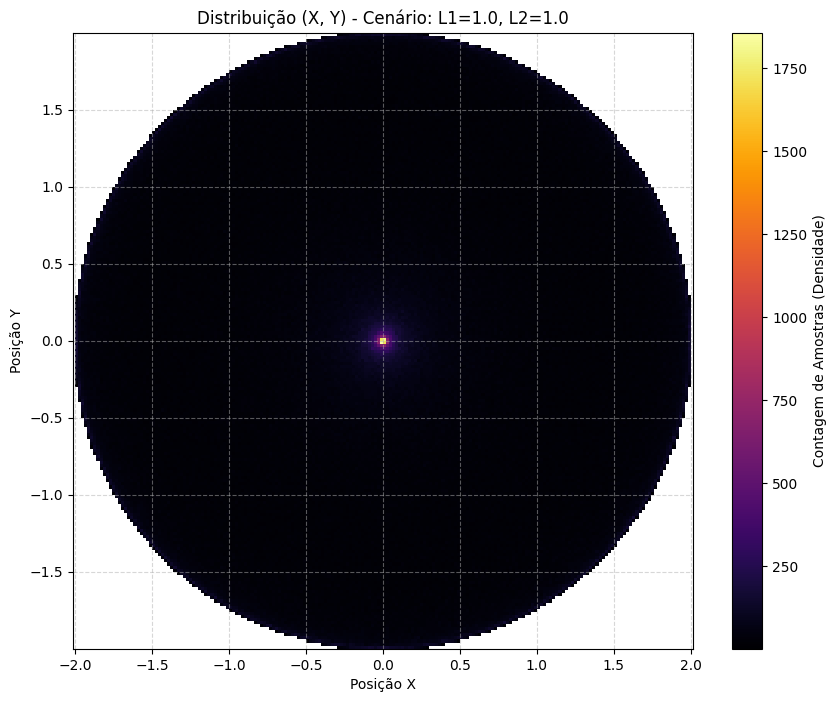

In [8]:
# Definir comprimentos
L1_1 = 1.0
L2_1 = 1.0

# Calcular posições
X1, Y1 = calcular_posicao(L1_1, L2_1, theta1, theta2)

# Plotar gráfico
plotar_histograma(L1_1, L2_1, X1, Y1, "L1_1_L2_1")

## Cenário 2: $L_1 = 1.0, L_2 = 0.5$

Aqui, testamos a "surpresa" com braços de comprimentos diferentes.
- Raio Máximo: $R_{max} = L_1 + L_2 = 1.5$
- Raio Mínimo: $R_{min} = |L_1 - L_2| = 0.5$

O robô **não** consegue mais alcançar o centro (0,0), criando um "buraco" no espaço de trabalho.


Processando L1=1.0, L2=0.5...


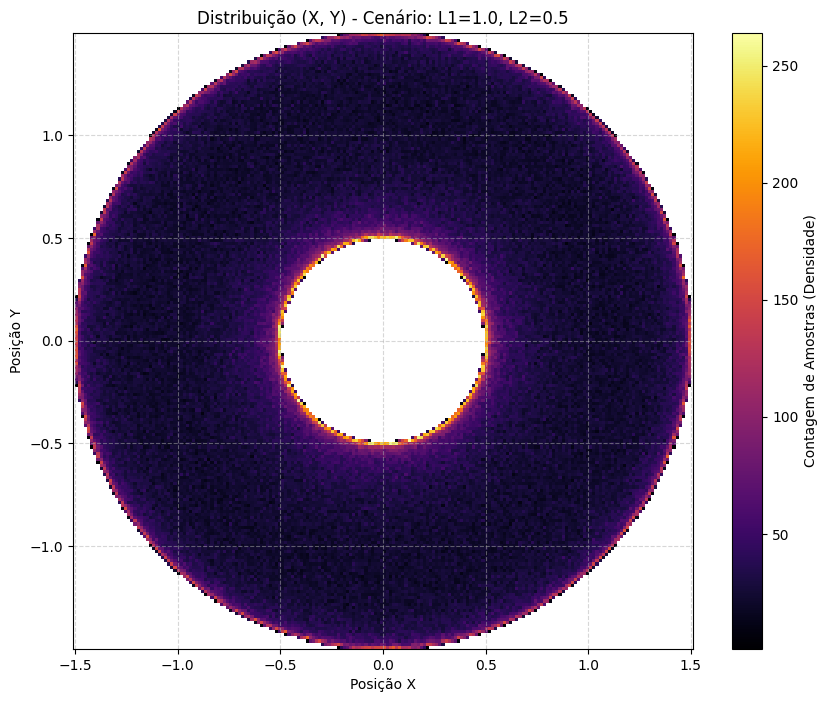

In [10]:
# Definir comprimentos
L1_2 = 1.0
L2_2 = 0.5

# Calcular posições
# (Note que usamos os MESMOS ângulos theta1 e theta2,
#  o que é correto para comparar as transformações)
X2, Y2 = calcular_posicao(L1_2, L2_2, theta1, theta2)

# Plotar gráfico
plotar_histograma(L1_2, L2_2, X2, Y2, "L1_1_L2_0_5")

## Conclusão e Análise da "Surpresa"

A simulação mostra claramente que a densidade de probabilidade da posição da garra, $f(X, Y)$, não é uniforme, mesmo com entradas angulares uniformes.

**A "Surpresa" é que a densidade se concentra nos limites do espaço de trabalho:**

1.  **Cenário 1 ($L_1 = L_2$):** A densidade é muito alta no **anel externo** (raio 2.0) e no **ponto central** (raio 0.0).
2.  **Cenário 2 ($L_1 \neq L_2$):** A densidade é muito alta no **anel externo** (raio 1.5) e no **anel interno** (raio 0.5).

**Por que isso acontece?**

Isso está diretamente relacionado ao **determinante Jacobiano** da transformação. A densidade de saída é inversamente proporcional ao Jacobiano.

$f(X, Y) \propto \frac{f(\theta_1, \theta_2)}{|J|}$

O Jacobiano se torna zero (ou muito pequeno) próximo a esses limites (singularidades do robô), o que, na prática, "amplifica" a densidade de probabilidade, fazendo com que a garra "passe mais tempo" nessas regiões.